 Big Pictures is having trouble sorting all the data they have collected. They ask us to build a picture sorter to organize and ***classify different types of objects*** so they don't have to do that.


This notebook will go over:

- The Machine Learning Pipeline
  - 🟦Importing
  - 🟧Data Preprocessing
  - 🟩CNN Building
  - 🟥Training
  - 🟪Testing

---

<br>

**Guide to completing this project:**

> ***Sections with bold and italics are instruction prompts you should follow to code***. When in doubt, read the bold and italics

> Codes (🟦🟧🟩🟥🟪) indicate where in the notebook / ML pipeline you are in

> Sections labeled with (⌛) may take longer amounts of time to code

> Click the index (📋) button on the left of your Colab Workspace to see where you are in completing the project

Good luck!
Start by opening up the "CNN Project" block!

# CNN Project

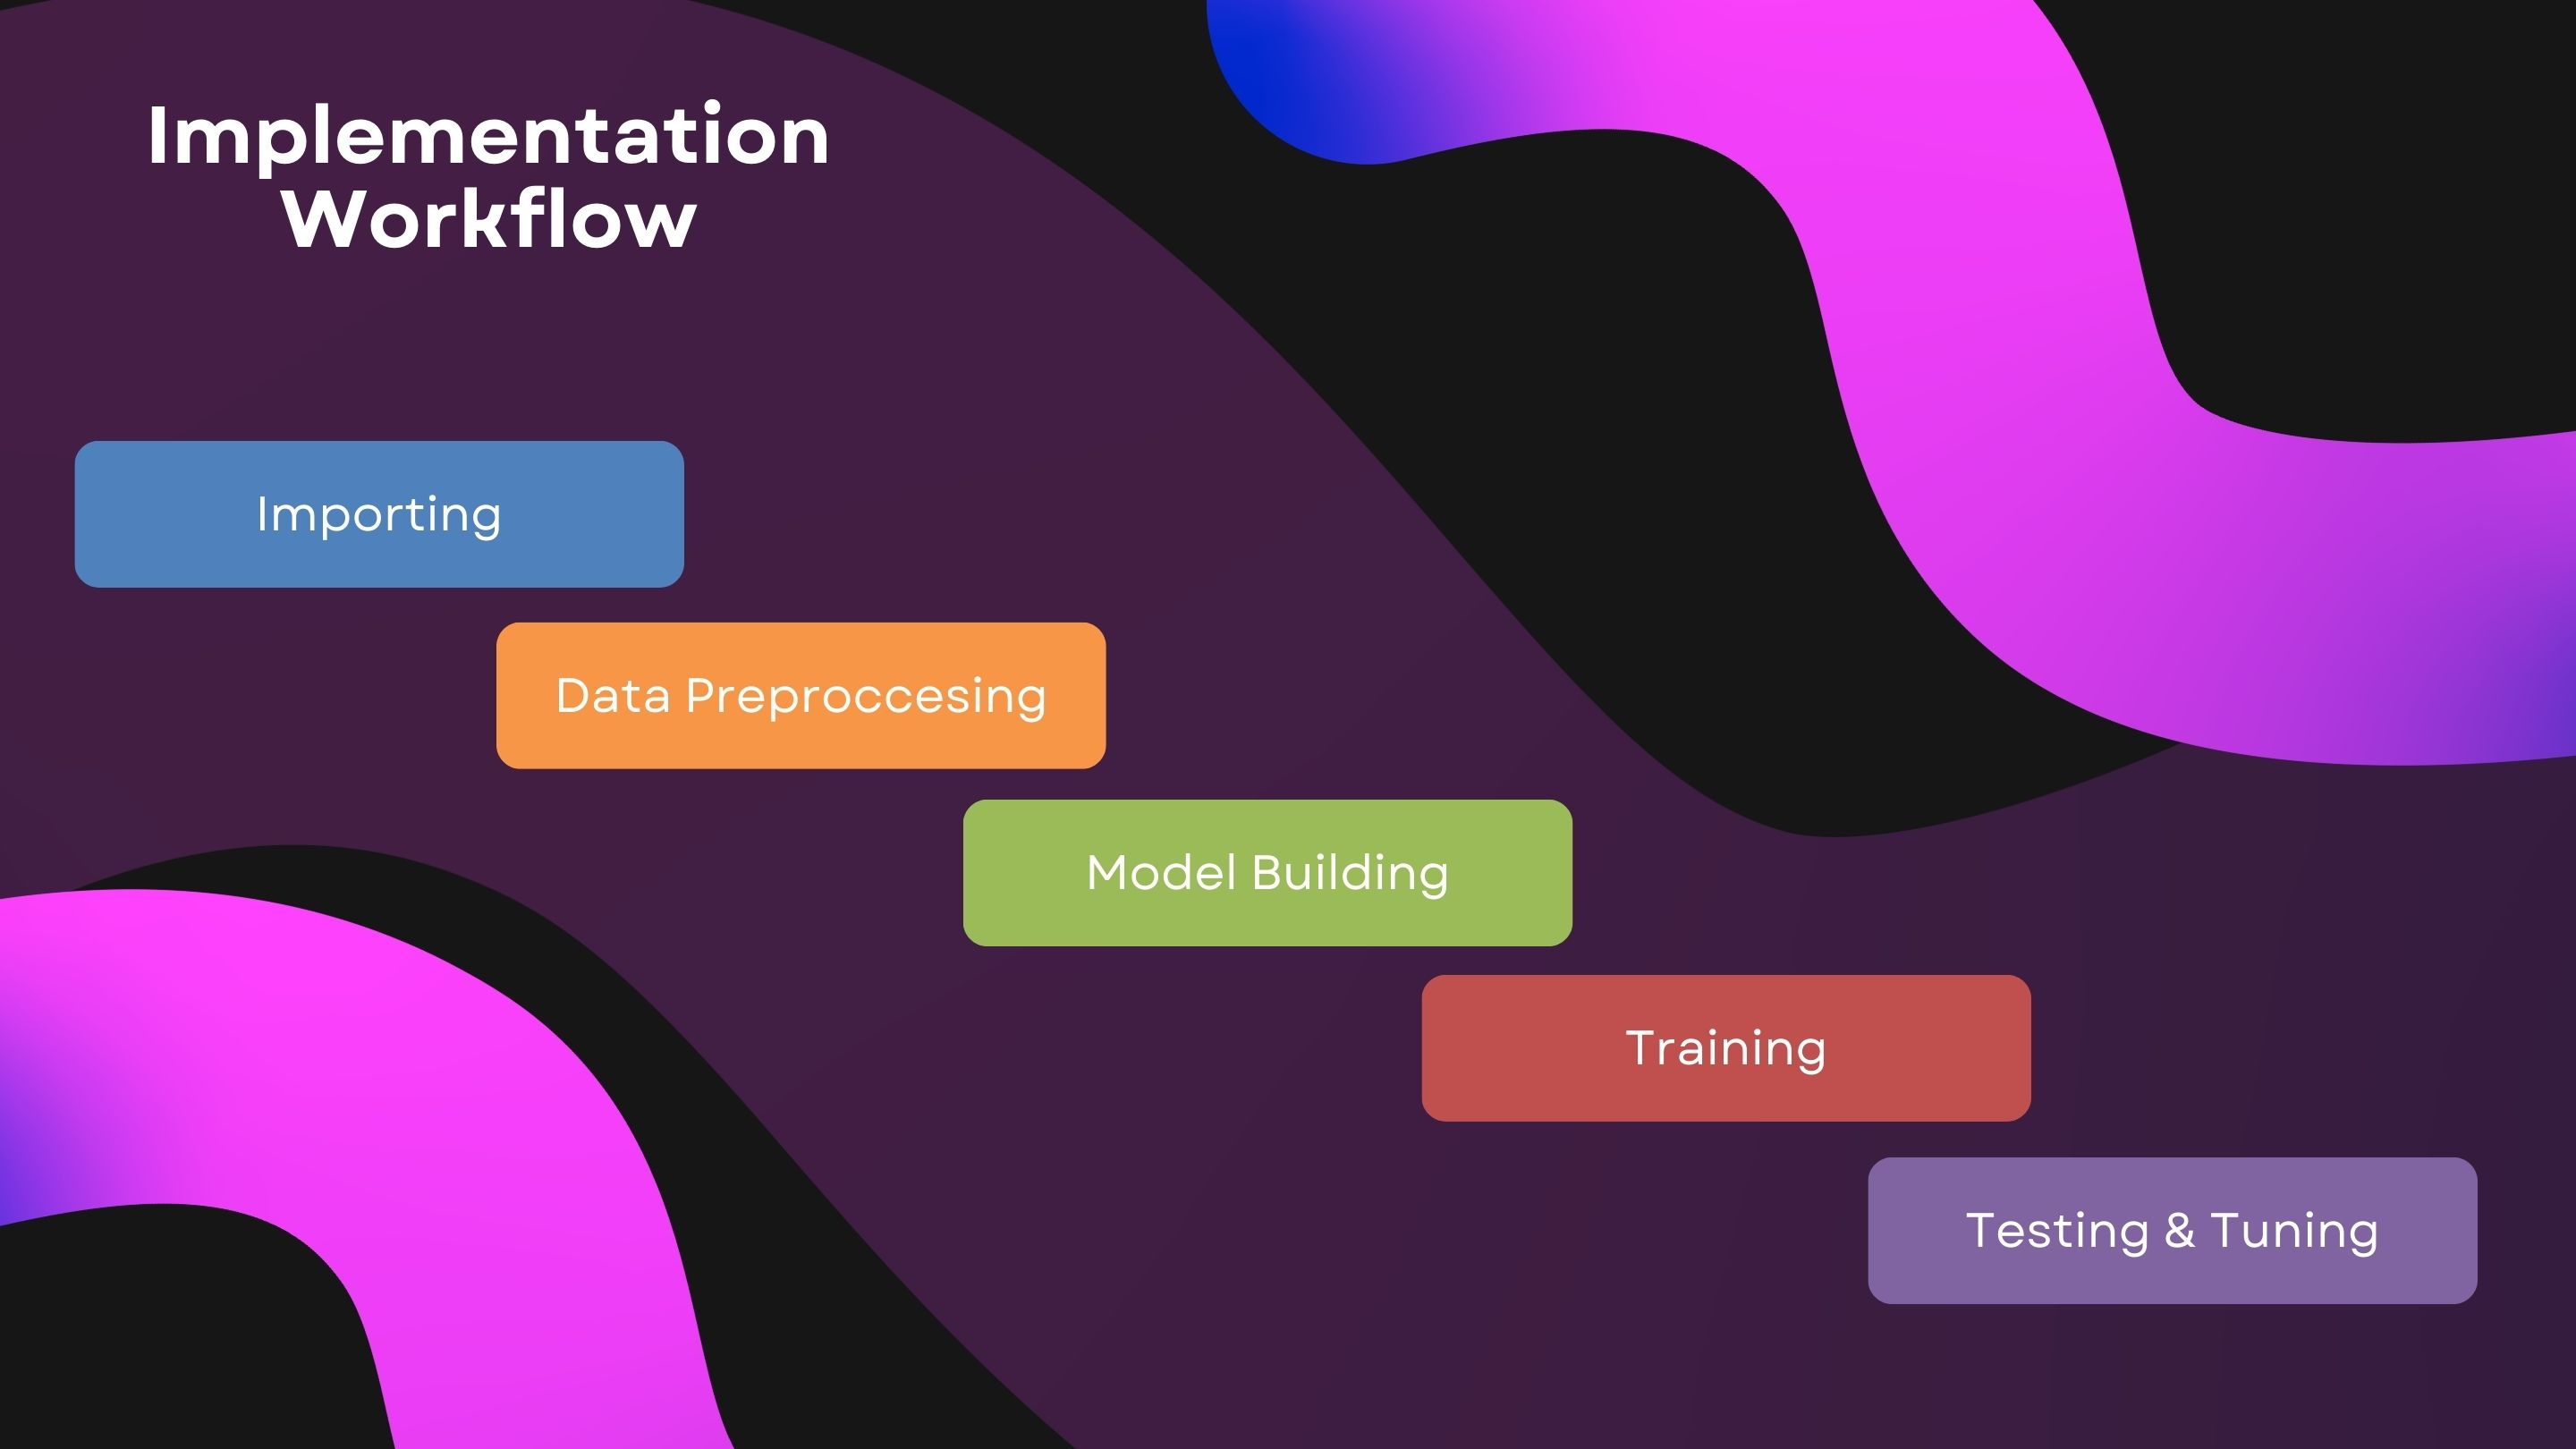

##🟦Importing

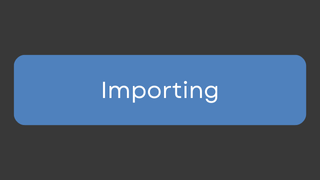

###Imports

We need to import all the libraries we will be using for our PyTorch-based neural network implementation:

>First, ***import `torch`***, which is the core PyTorch library. This is our fundamental package for deep learning, providing the foundation for all tensor operations and computations we'll perform.

>From PyTorch, ***specifically import `torch.nn` as `nn`*** (neural networks). This module contains all the building blocks we need to create neural networks, including layers, activation functions, and loss functions, etc.

>***Also import `torchvision`*** and its submodules: `datasets` and `transforms`. This package is essential for computer vision tasks - `datasets` gives us access to common datasets like MNIST or CIFAR-10, while `transforms` helps us preprocess our images with operations like converting them to tensors (only inport the `ToTensor` functionality). We also import the ***Dataloader*** from `torch.utils.data`

>A few more things we import are `summary` from the `torchsummary` module and `tqdm` from the `tqdm` module. The former is used to print out a easy-to-understand diagram explaining your model architecture which we'll use after model building, while the latter is used for training and testing loops.

>Finally, ***import `matplotlib`*** for creating visualizations. We import it twice - once `as plt` and once with specific plotting functions (`pyplot`) - to ensure we have access to all plotting capabilities.

***Go and import `torch` and `torch.nn as nn`*** to make the code below work. Afterwards, run the code with the play button [>]

In [ ]:
# CODE HERE
import torch
import torch.nn as nn
import torchvision  # Library with tools for computer vision
from torchvision import datasets  # Ready-to-use image datasets like CIFAR, MNIST
from torchvision.transforms import ToTensor, transforms  # Tools to process images
from torch.utils.data import DataLoader, Subset, Dataset  # Tools to handle data

from torchsummary import summary  # Prints a nice summary of your model
from tqdm import tqdm  # Adds progress bars to your loops

import matplotlib as plt  # Library for creating charts and visuals
import matplotlib.pyplot as plt  # The part of matplotlib for actually drawing plots
import numpy as np  # For working with arrays and math operations

print(torch.__version__)  # Shows which version of PyTorch you're using

2.6.0+cu124


## 🟧Data Preprocessing

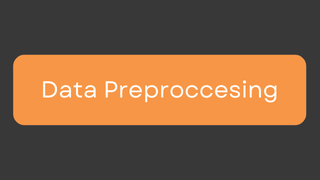

###Loading the CIFAR-10 Dataset from PyTorch torchvision
The first step of the project is to load the data we want to use.
CIFAR-10 is a widely-used dataset for image classification tasks, created by Alex Krizhevsky, Vinod Nair, and Geoffrey Hinton. Here are its key characteristics:

1. The dataset consists of `60,000` color images of everyday objects:

>>50,000 training images
>>10,000 test images

2. Each image is '32x32` pixels with 3 color channels (RGB), making it slightly larger and more complex than Fashion-MNIST.

3. The dataset contains 10 different classes of objects, labeled from 0 to 9:

  1. Airplane
  2. Automobile
  3. Bird
  4. Cat
  5. Deer
  6. Dog
  7. Frog
  8. Horse
  9. Ship
  10. Truck

4. The classes are balanced, with each having exactly 5,000 training images and 1,000 test images.



![An Image](https://datasets.activeloop.ai/wp-content/uploads/2022/09/CIFAR-10-dataset-Activeloop-Platform-visualization-image-1.webp)

First, you'll need to define your image preprocessing pipeline. Set your `transform` variable equal to `transforms.Compose()`. This creates a sequential pipeline that applies multiple transformations onto the images to preprocess them. Inside the `Compose` function, you'll pass a list containing:

- `transforms.ToTensor()`: this converts the NumPy arrays into PyTorch tensors
- `transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))`: this standardizes the pixel values, these numbers are the mean and std dev (respectively) of all the RGB pixel values in the dataset (pre-calculated by the ppl who made CIFAR-10). This normalization helps the neural network train better

In [ ]:
# CODE HERE
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.4914, 0.4822, 0.4465), (0.2470, 0.2435, 0.2616))])

Let's load the dataset. This dataset is in the torchvision module (which we previously imported).***So, set your `train_data` equal to `datasets.
CIFAR10()`.*** In the parameters, you will include:
- `root='data',`
- `train= True,`
- `download=True,`
- `transform=ToTensor(),`
- `target_transform=None,`


***Similarly for `test_data`, set it equal to `datasets.CIFAR10()`.*** In the parameters, you will include
- `root='data',`
- `train= False,`
- `download=True,`
- `transform=ToTensor(),`
- `target_transform=None,`

In [ ]:
train_data = datasets.CIFAR10(  # Loads the CIFAR-10 training dataset
    root='data',
    train= True,
    download=True,
    transform=transform,
    target_transform=None,

)

test_data = datasets.CIFAR10(  # Loads the CIFAR-10 test dataset
    root='data',
    train= False,
    download=True,
    transform=transform,
    target_transform=None,
)

100%|██████████| 170M/170M [00:03<00:00, 48.4MB/s]


### Data Exploration

Lets explore more about this dataset they gave us.

We can use the `len()` method to get the length of our `train_data` and `test_data`. ***Use the `len()` method to print the length of both our datasets.***

We can also use the `.shape` attribute on our datasets (within the `.data` attribute) to see the dimensions of our dataset. ***Use the `.shape` attribute to print the shape of both our datasets.***

In [ ]:
# CODE HERE
print(f'Length of train data: {len(train_data)} | Shape of train data {train_data.data.shape}')
print(f'Length of test data: {len(test_data)} | Shape of test data {test_data.data.shape}')

Length of train data: 50000 | Shape of train data (50000, 32, 32, 3)
Length of test data: 10000 | Shape of test data (10000, 32, 32, 3)


<br>

Let's understand how this train data is formatted:

Our shape of our train data is as follows:

`[50000, 32, 32, 3]`

> The first number `50000` is the amount of images we have

> The second number `32` is the amount of pixels left to right

> The third number `32` is the amount of pixels down to up

> The fourth number `3` represents the 3 different RGB channels

The train dataset is a list (50000 items) of tuples formatted as `[Image, class/label]`
> So... the first 0 indexes the 1st tuple out of 50000 and the 2nd 0 indexes the image (If you index 1 you will get the class number/classification number)

Let's see how many classes there are in this dataset and what they are. Print the length (`len`) of the `classes` attribute of `train_data` to see the # of classes, then simply print `train_data.classes` to see the list of all the classes in CIFAR-10.

In [ ]:
# CODE HERE
print(f'Length of classes: {len(train_data.classes)}')
print(f'Classes: {train_data.classes}')

Length of classes: 10
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


### First image


Let's visualize the first image of our dataset. Let's get the shape and the class of it.

<br>

---

<br>

***Use the `.shape` method on `train_data[0][0]` to get the shape of our first image. Then use `train_data[0][1]` to get the class it is in.***

In [ ]:
# CODE HERE
print(f'Shape of first image: {train_data[0][0].shape}')
print(f'Class of first image: {train_data[0][1]}')

Shape of first image: torch.Size([3, 32, 32])
Class of first image: 6


#### Visualize - Images will look weird because with normalized it

***Play around with the code below (change `image_num` on the right) and see what some of the images look like.***

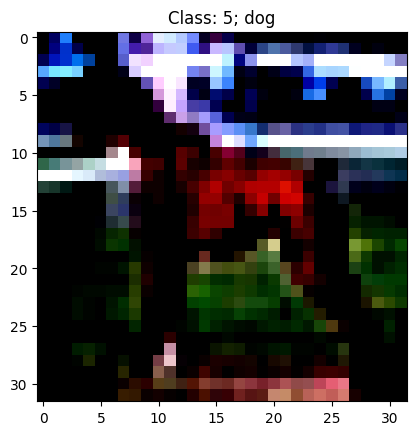

In [ ]:
image_num = 9235 #@param {type:"raw"}
image = train_data[image_num][0].permute(1, 2, 0) # train_data[image_num] is a tuple of (image, label)... we index 0 to get the image
# Once we index 0, we change the order from (channel x height x width) -> (height, width, channel)***This is how matplotlib reads images
plt.imshow(image)
label = train_data[image_num][1]
plt.title(f'Class: {label}; {train_data.classes[label]}')
plt.show()

## Building the Model


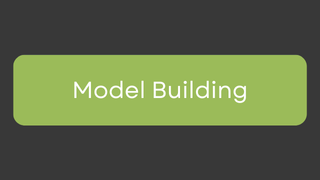

**Let's create the CNN model using PyTorch's Sequential API.** ***Your ConvNet class should have the following architecture:***

**For the convolutional layers section:** ***Set your `conv_layers` equal to `nn.Sequential()`.*** Inside the Sequential, you'll include these layers in order:
- `nn.Conv2d(3, 16, 3, padding=1),` (3 input channels → 16 filters, 3x3 kernel)
- `nn.BatchNorm2d(16),` (batch normalization for 16 channels)
- `nn.ReLU(),` (activation function)
- `nn.MaxPool2d(2, stride=2),` (downsampling by factor of 2)
- `nn.Conv2d(16, 32, 3, padding=1),` (16 filters → 32 filters)
- `nn.BatchNorm2d(32),` (batch normalization for 32 channels)
- `nn.ReLU(),` (activation function)
- `nn.MaxPool2d(2, stride=2),` (downsampling by factor of 2)
- `nn.Conv2d(32, 64, 3, padding=1),` (32 filters → 64 filters)
- `nn.BatchNorm2d(64),` (batch normalization for 64 channels)
- `nn.ReLU(),` (activation function)
- `nn.MaxPool2d(2, stride=2),` (final downsampling)

**For the fully connected layers section:** ***Set your `fully_connected` equal to `nn.Sequential()`.*** Inside the Sequential, you'll include:
- `nn.Linear(64*4*4, 128),` (flattened features → 128 neurons)
- `nn.ReLU(),` (activation function)
- `nn.Linear(128, 10),` (128 neurons → 10 output classes)

**For the flatten operation:** ***Set your `flatten` equal to `nn.Flatten()`.*** This will convert 2D feature maps into 1D vectors.

**For the forward method:** ***Define your `forward` method that takes `x` as input.*** Then:
- ***Set `x` equal to `self.conv_layers(x)`*** to pass through convolutional layers
- ***Set `x` equal to `self.flatten(x)`*** to flatten the feature maps
- ***Set `x` equal to `self.fully_connected(x)`*** to pass through fully connected layers
- ***Return `x`***

**Finally:** ***Create an instance of your model by setting `model = ConvNet()`.***

---

**TIPS:**
- The Sequential API eliminates the need to manually call each layer in the forward pass
- Notice how `nn.Linear()` parameters don't need explicit `in_features=` and `out_features=` labels
- The `64*4*4` calculation comes from: 64 filters × 4×4 spatial dimensions (after three 2×2 pooling operations on 32×32 CIFAR-10 images)
- Each convolutional block follows the pattern: Conv → BatchNorm → ReLU → MaxPool

In [ ]:
class ConvNet(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv_layers = nn.Sequential(
        # CODE HERE
        nn.Conv2d(3, 16, 3, padding=1),
        nn.BatchNorm2d(16),
        nn.ReLU(),
        nn.MaxPool2d(2, stride=2),
        nn.Conv2d(16, 32, 3, padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(2, stride=2),
        nn.Conv2d(32, 64, 3, padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(2, stride=2),
    )

    self.fully_connected = nn.Sequential(
        # CODE HERE
        nn.Linear(64*4*4, 128),
        nn.ReLU(),
        nn.Linear(128, 10),
    )

    self.flatten = nn.Flatten()  # Flattens feature maps into a 1D vector



  def forward(self, x):
    # CODE HERE
    x = self.conv_layers(x)
    x = self.flatten(x)
    x = self.fully_connected(x)
    return x

model = ConvNet()  # Create an instance of the model

### Device & Model Summary

Let's set up a `device` variable set to `"cuda"` (Colab GPU) if `torch.cuda.is_available`, otherwise we'll use the `"cpu"`. Print the device to see what we'll be able to train with.

In [ ]:
# CODE HERE
device = 'cuda' if torch.cuda.is_available else "cpu"
model.to(device)
print(device)

cuda


Lets see how our model is structured. Use the `summary()` method with the parameters:
- `model`
- `input_size` of `(3,32,32)`

In [ ]:
# CODE HERE
summary(model, input_size=(3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             448
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
         MaxPool2d-4           [-1, 16, 16, 16]               0
            Conv2d-5           [-1, 32, 16, 16]           4,640
       BatchNorm2d-6           [-1, 32, 16, 16]              64
              ReLU-7           [-1, 32, 16, 16]               0
         MaxPool2d-8             [-1, 32, 8, 8]               0
            Conv2d-9             [-1, 64, 8, 8]          18,496
      BatchNorm2d-10             [-1, 64, 8, 8]             128
             ReLU-11             [-1, 64, 8, 8]               0
        MaxPool2d-12             [-1, 64, 4, 4]               0
          Flatten-13                 [-1, 1024]               0
           Linear-14                  [

## 🟥Training the Model


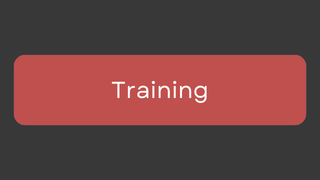

1. Take the train_data as input (This includes the image and the class label)
2. Make a Prediction with the Model
3. See how right/wrong the prediction was w/ the loss function
4. Update the model parameters to do better next time

### Data Loader

One step we will have to do in preprocessing is creating Dataloaders. Dataloaders will feed the model bite sized bits of the dataset. You don't want to throw all the material to the model at once, and Big Pictures doesn't want us to burn our computing systems.

<br>

---

<br>

***To create the dataloaders, use the `Dataloader()` method to create a train and test dataloader. Input the `train_data` and `test_data`, and a `batch_size=32` for both as parameters. Additionally:***

> Input `shuffle=True` for `train_dataloader`

We shuffle the data in our training dataloader because:

-   Shuffling helps the model learn better by preventing it from seeing data in the same order every epoch
- It reduces overfitting to the sequence of examples
- Ensures the model doesn't learn spurious patterns based on data ordering
- Makes each batch more representative of the overall dataset distribution



> Input `shuffle=False` for `test_dataloader`

We don't shuffle the data in our testing dataloader because:

- We want reproducible results - running evaluation multiple times should give identical outputs
- It's easier to debug and analyze results when you know exactly which samples produced which predictions
- Some evaluation metrics or analyses might depend on maintaining the original order
- There's no learning happening during testing, so shuffling provides no benefit

In [ ]:
# CODE HERE
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=False)

<br>

In Dataloaders, we use `iter()` to make an iterable. This allows us to use the `next()` method to retrieve the subsequent next item. ***Make `train_dataloader` an iterable, and use `next()` to get the first item of the dataloader. Then, print the following data:***

- Shape of the image
- Shape of the label
- Number of batches (the 32 length bite-sized chunks)

<br>

---

<br>

TIPS:

- The way iterables work is that when you call the `next()` method, it returns whatever those items in the iterable were. So for example if we had a simple list of fruit:

- `fruits = ['apple','orange','banana']`

- We could make it an iterable and call `next()` on it. This `next()` method will RETURN the fruit it was on.

- `current_fruit = next(iter(fruits))`
- `print(current_fruit)`

- This would return 'apple'! Remember, your `train_dataloader` has two items that will be returned when calling `next()`.


In [ ]:
# CODE HERE
train_dataloader = iter(train_dataloader)
image, label = next(train_dataloader)
print(image.shape)
print(label.shape)
print(len(DataLoader(train_dataloader, batch_size=32)))

torch.Size([32, 3, 32, 32])
torch.Size([32])
49


### Loss Function & Optimizer

To have our model work, we also need to call a loss function and optimizer function.

> For loss, because we are doing a classification tasks with 10 distinct classes, we use `nn.CrossEntropyLoss()`
- If we were doing a regression problem, which loss function would we use?
- What about if we were doing a classification task with only 2 classes?

> For optimizer, we use `torch.optim.Adam(params=model.parameters(), lr=0.001)`. Adam is a very common and efficent optimizer, so expect to see it a lot.

***Create new `loss_fn` and `optimizer` variables and assign them their respective functions***

In [ ]:
# CODE HERE
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)

### Train Loop

Now we have everything ready to train our model. ***Big Pictures says we should:***

1. Make a `train_loop` function with the following parameters: `train_dataloader`, `model`, `loss_fn`, `optimizer`, and `epochs`
2. Putting `model` into train mode by using the `.train()` method
3. Create an array to store our training losses
4. Use a for loop for the epochs and create a `train_loss_epoch` variable set to 0
5. Use a for loop each batch in `train_loader` using a `tdqm` progress bar (use `tdqm()` method with the `train_dataloader` as a parameter)

> Remember that when iterating through `train_dataloader`, we get returned the image and label

6. Set the optimizer's zero gradients using the `.zero_grad()` method
7. Define the `pred` (prediction) using the `model()` function to take in our image
8. Set a loss variable to our `loss_fn()` function (CELoss). Input our `pred` and `label` as parameters
9. Call the backward pass using the loss's `.backward()` method and the optimizer's `.step()` method, then add the `loss.item` to `train_loss_epoch`
10. Get and print the average loss for the epoch (you can get the loss of a singular batch using the `.item()` method on the loss), and append this average loss to `train_loss` (so that the model can 'learn' from its mistakes via gradient descent with our Adam optimizer)
11. Use an f-string to print the current epoch completed and its corresponding loss
12. Return the final loss

In [ ]:
def train_loop(train_dataloader, model, loss_fn, optimizer, epochs):
  # CODE HERE (steps 2-3)
  train_loss = []
  model.train()

  for epoch in range(epochs):
    train_loss_epoch = 0
    for image, label in tqdm(train_dataloader, desc="Training Model"):
      # CODE HERE (steps 5-9)
      image = image.to(device) # Move image to the device
      label = label.to(device) # Move label to the device

      optimizer.zero_grad()
      pred = model(image)
      loss = loss_fn(pred, label)

      loss.backward()
      optimizer.step()
      train_loss_epoch += loss.item()

    # CODE HERE (steps 10-11)
    average_loss = train_loss_epoch / len(train_dataloader)
    train_loss.append(average_loss)
    print(f"Epoch: {epoch+1} | Loss: {average_loss}")
  return train_loss

### Train the Model

Now actually train your model using the parameters of the `train_loop()` function and add the correct parameters from objects we already defined. Train 10 epochs so we don't take too long to train, but it still may take some time. ***Train the model, and move to the next task whilst your model trains.***

In [ ]:
# CODE HERE
losses = train_loop(train_dataloader, model, loss_fn, optimizer, 10)

Training Model:   0%|          | 0/1563 [00:00<?, ?it/s]


Epoch: 1 | Loss: 0.0


Training Model:   0%|          | 0/1563 [00:00<?, ?it/s]


Epoch: 2 | Loss: 0.0


Training Model:   0%|          | 0/1563 [00:00<?, ?it/s]


Epoch: 3 | Loss: 0.0


Training Model:   0%|          | 0/1563 [00:00<?, ?it/s]


Epoch: 4 | Loss: 0.0


Training Model:   0%|          | 0/1563 [00:00<?, ?it/s]


Epoch: 5 | Loss: 0.0


Training Model:   0%|          | 0/1563 [00:00<?, ?it/s]


Epoch: 6 | Loss: 0.0


Training Model:   0%|          | 0/1563 [00:00<?, ?it/s]


Epoch: 7 | Loss: 0.0


Training Model:   0%|          | 0/1563 [00:00<?, ?it/s]


Epoch: 8 | Loss: 0.0


Training Model:   0%|          | 0/1563 [00:00<?, ?it/s]


Epoch: 9 | Loss: 0.0


Training Model:   0%|          | 0/1563 [00:00<?, ?it/s]

Epoch: 10 | Loss: 0.0


In [ ]:
for name, param in model.named_parameters():
    if param.grad is None:
        print(f"No gradient for: {name}")


In [ ]:
print(losses)

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


### Loss Graph (if training is finished)

**ONLY RUN IF YOUR MODEL IS FINISHED TRAINING**

Let's visually see how our model did. ***Use the matplotlib `plt` module to help show Big Pictures our model loss over epochs.***

<br>



---

<br>

TIPS:

- Here are some essential commands to show plots

- `plt.plot(x,y)` will create a plot of x values and y values

> For example, `plt.plot([1,2,3],[4,5,6])` would plot on the x-axis 1,2,3, and on the y-axis 4,5,6

- `plt.show()`

- Here are some useful commands to make beautiful plots

- `plt.title()` will have the parameter as the label

- `plt.xlabel()` will have the parameter as the label

- `plt.ylabel()` will have the parameter as the label

- You may need to create a list of numbers from 1-11 for your x-axis. Use `list(range(1,11))`.

In [ ]:
# CODE HERE

## 🟪Testing

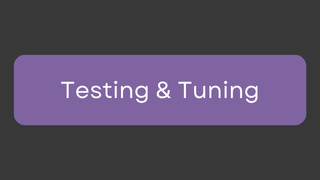

Now we have everything ready to test our model. ***Big Pictures recommends:***

1. Make an `accuracy` function that can calculate the total amount of correct predictions vs. wrong predictions the model makes
2. Make a `test_loop` function with the following parameters: `test_dataloader`, `model`
3. Putting `model` into eval (testing) mode by using the `.eval()` method
4. Define `correct` and `total` which will represent the upcoming predicitions we make
5. Use a `with` statement to specify to not track gradients using the `torch` module's `.no_grad()` method (because we don't need them during testing)
6. Use a for loop each batch in `test_loader` using a `tdqm` progress bar (use `tdqm()` method with the `test_loop` as a parameter)
7. Define the `pred` (prediction) using the `model()` function to take in our image
8. Increase `correct` by one IF the prediction was correct. Always ncrease the total by one
> We can use `pred.argmax(1) == label` to check whether this prediction was the same as it's label. Also use `.type(torch.float).sum().item()` to convert that boolean expression.
9. Use an f-string to print our accuracy using the `accuracy()` function we defined earlier

In [ ]:
def accuracy(correct, total):
  return correct / total * 100

In [ ]:
def test_loop(test_dataloader, model):
  # CODE HERE (steps 3-4)
  correct = 0
  total = 0

  with torch.no_grad():
    for image, label in tqdm(test_dataloader, desc="Testing Model"):
      # CODE HERE (steps 7-8)

    # CODE HERE (step 9)

SyntaxError: incomplete input (ipython-input-55-3294857738.py, line 10)

Now actually test your model using the parameters of the `test_loop()` function and add the correct parameters from objects we already defined. ***Test the model.***

In [ ]:
# CODE HERE

###Visualize Testing

Let's give Big Pictures a a demo of our ANN classifier. ***Play around with our model (tinker with the `rand_idx` on the right) and see whether you think the predictions it makes are correct!***

In [ ]:
rand_idx = 9234 #@param {type:"raw"}
image, label = test_data[rand_idx]

print(image.shape)
with torch.no_grad():
  prediction = model(image.unsqueeze(0).to(device))

# Get the predicted class index
pred_idx = prediction[0].argmax().item()  # For first image in batch

plt.figure(figsize=(5,5))
plt.title(f'Prediction: {test_data.classes[pred_idx]} | Correct Label: {test_data.classes[label]}')
plt.imshow(image[0].squeeze(), cmap='gray')  # Show first image in batch
plt.show()

### Hyperparameter Tuning

There's still a lot we can do to improve the model. Some notable ways are to:

- Change learning rate (`lr`)
- Change number of epochs and see when the loss converges (flattens)
- Adding more Linear layers (`nn.Linear()`)

## HOWEVER, you don't always have to train a model; just use a pretrained model

>GitHub for pretrained models on Cifar-10: https://github.com/chenyaofo/pytorch-cifar-models

**Let's explore available pre-trained CIFAR models from Torch Hub.** ***First, import the necessary libraries:***
- `import torch`
- `from pprint import pprint`

***Then, use `pprint()` to display the available models by calling `torch.hub.list()`.*** In the parameters, include:
- `"chenyaofo/pytorch-cifar-models",` (the repository name)
- `force_reload=True,` (ensures latest model list is fetched)

In [ ]:
# CODE HERE


**Now let's load a specific pre-trained model.** ***Set your `pretrained_model` equal to `torch.hub.load()`.*** In the parameters, include:
- `"chenyaofo/pytorch-cifar-models",` (the repository name)
- `"cifar10_resnet20",` (the specific model architecture)
- `pretrained=True,` (loads with pre-trained weights instead of random initialization)

In [ ]:
# CODE HERE


**Move the pre-trained model to your device (CPU or GPU).** ***Use `pretrained_model.to(device)` to transfer the model to the appropriate computing device.***

In [ ]:
# CODE HERE

In [ ]:
# print(summary(pretrained_model, (3, 32, 32)))

Run the `test_loop` on the `pretrained_model` with `test_dataloader`

In [ ]:
# CODE HERE

Run this cell a few times, it'll pick a random image and run the pre-trained model on it; see how the pre-trained model performs.

In [ ]:
rand_idx = torch.randint(0, len(test_data), (1,)).item()  # Pick a random index from test set
image, label = test_data[rand_idx]  # Get image and label from test set

print(image.shape)  # Print image shape

with torch.no_grad():  # Disable gradients for faster inference
  prediction = pretrained_model(image.unsqueeze(0).to(device))  # Add batch dim & pass image to model
  print(prediction.shape)  # Print model output shape

pred_idx = prediction[0].argmax().item()  # Get index of highest predicted probability

plt.figure(figsize=(5,5))  # Create figure for visualization
plt.title(f'Prediction: {test_data.classes[pred_idx]} | Correct Label: {test_data.classes[label]}')  # Show prediction & actual label
plt.imshow(image.permute(1, 2, 0))  # Convert (C, H, W) to (H, W, C) for correct display
plt.show()  # Display image


#📝Homework


Make a copy of this: https://colab.research.google.com/drive/136iqpZ0AlahWL2f6KK9C-PPzXR5b7znd?usp=sharing

# ❗❗❗Extra/Optional (Async.) Material Below:

---



##Data Augmentation & Loading Open Source Dataset
Data Augmentation is a technique used to artificially increase the size of your training dataset by creating modified versions of your existing data. Think of it like taking a photo and creating several variations of it - tilting it slightly, making it brighter or darker, flipping it horizontally, or zooming in a bit.

In this case our model is very small, only two Conv Layers and 2 linear layers
But but what if this was our model was 50 layers? Thats a pretty big model. The amount of data you would need to train that would be much larger than 50,000 images, a good amount would maybe be 100,000-1,000,000 depending on the complexity of the model

###Load Data


In [ ]:
train_data = datasets.CIFAR10(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
    )

test_data = datasets.CIFAR10(
    root="data",
    train=False,
    download=True,
    transform=ToTensor())

In [ ]:
train_data.data.transpose(0, 3, 1, 2).shape

In [ ]:
!pip install -U albumentations

In [ ]:
import albumentations as A
from torch.utils.data import TensorDataset, DataLoader

In [ ]:
def HorizontalFlip():
    return A.Compose([
        A.HorizontalFlip(p=1.0),
    ])

def VerticalFlip():
    return A.Compose([
        A.VerticalFlip(p=1.0),
    ])


HF = HorizontalFlip()
VF = VerticalFlip()

In [ ]:
for original_image, label in train_data:

  original_image = original_image.permute(1, 2, 0)
  print(f'Shape of original image is: {original_image.shape}')
  plt.imshow(original_image)
  plt.show()

  augmented_image = HF(image=np.array(original_image))['image']
  print(f'Shape of augmented image is: {augmented_image.shape}')
  plt.imshow(augmented_image)
  plt.show()

  break

In [ ]:
augmented_data = {
    'images': [],
    'labels': []
}

for original_image, label in tqdm(train_data):
    original_np = original_image.numpy()

    # Apply horizontal flip
    HF_image = HF(image=original_np)['image'] # (32, 32, 3)
    HF_augmented = augmented_image.transpose(2,0,1) # (32, 32, 3) -> (3, 32, 32)

    VF_image = VF(image=original_np)['image']# (32, 32, 3)
    VF_augmented = augmented_image.transpose(2,0,1)# (32, 32, 3) -> (3, 32, 32)

    augmented_data['images'].append(HF_augmented)
    augmented_data['labels'].append(label)

    augmented_data['images'].append(VF_augmented)
    augmented_data['labels'].append(label)

# Convert to numpy arrays
augmented_images = np.array(augmented_data['images'])  # Should be (N, 3, 32, 32)
augmented_labels = np.array(augmented_data['labels'])

# Now they should have matching dimensions for concatenation
print("Shapes before concatenation:")
print(f"Original data shape: {train_data.data.transpose(0, 3, 1, 2).data.shape}")
print(f"Augmented data shape: {augmented_images.shape}")

train_images = np.concatenate((train_data.data.transpose(0, 3, 1, 2).data, augmented_images), axis=0)
train_labels = np.concatenate((np.array(train_data.targets), augmented_labels), axis=0)

In [ ]:
len(train_images)

In [ ]:
train_data = TensorDataset(torch.tensor(train_images), torch.tensor(train_labels))


train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)

In [ ]:
for image, label in train_dataloader:
  print(f'Shape of the images: {image.shape}')
  print(f'Shape of the labels: {label.shape}')
  break

In [ ]:
losses = train_loop(train_dataloader, model, loss_fn, optimizer, epochs=1)

## Viola just like that, you have 50,000 more images to train your model on
